#Why this data set? 

##What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.

My data set looks at all of the people who have been accepted to the Data Science program since the creation of Hen at Thinkful. It is valuable Data from which we can pull our average close rate, how long on average it takes people to enroll and how many admissions counselors people interacted with before signing up. Because this is the last stop in the admissions process we are given the chance to see what is working and what is not. This also, allows us to reverse engineer how many people we need at the top of the funnel to move down to the bottom of the funnel, since we will have a good estimate of how many people we close and generally how long it takes to close them.


In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
import scipy
from scipy.stats import ttest_1samp
%matplotlib inline

df = pd.read_csv('sales_data.csv')
print (df)

df['How much help'].values

                  Name                             Email  Signed up  \
0         Mark Goldfarb          markcgoldfarb@gmail.com          1   
1           Farouk Rice               faroukjr@gmail.com          1   
2    Francisco Silverio           silveriofr@hotmail.com          0   
3    David Antzelevitch     david.antzelevitch@gmail.com          1   
4          Nadia Morgen            usability42@gmail.com          1   
5       Omid Naghshineh           mrnaghshineh@gmail.com          1   
6               Shu Cui              shu.cui17@gmail.com          0   
7     Branden Shimamoto       brandenshimamoto@gmail.com          0   
8        Aakrati Mathur          mathuraakrati@gmail.com          0   
9       Hellen Wainaina          hellenwambui7@gmail.com          0   
10    Bernard Tumanjong            tumanjongbt@gmail.com          1   
11           David Kang          david.kang714@gmail.com          0   
12     Jennifer Killian     ms.jenniferkillian@gmail.com          0   
13    

array([2, 1, 1, 3, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0,
       3, 0, 0, 0, 0, 1, 1, 3, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 3])

#Analyze

##Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.

1) What is average close rate of students who are accepted in the program?
2) How long does it typically take for students to sign up?
3) What is the distribution of how many different employees from Thinkful that students talk to?

# 1) What is average close rate of students who are accepted in the program?

In [18]:
#Finding the average close rate
total_students=df.shape[0]

# Close rate will be equal to the number of enrollments divided by the number of total students in the data set
enrollments=(len (df[df['Signed up'] == 1]))
close_rate= (enrollments/total_students)*100

print(close_rate)
#Update since the month it has increased to 48.84%, so nearly 50%

46.774193548387096


This is good news and also gives us room for improvment. Right now is a student is accepted there is very close to a 50% chance they will be signing up with in a very short amount of time. If we took the time to compare this with the rest of the funnel we could set how many applications that we needed to arrive at current goals for the month and what we would need to grow.

This also can give us a bit of stretch goal for improving this close rate. Combining this stat with how long it takes someone to sign up, we can find the window that we need to be politely pursue our students so ask to increase this close rate. My stretch goal would be to get the number to 60%.

# 2) How long does it typically take for students to sign up?

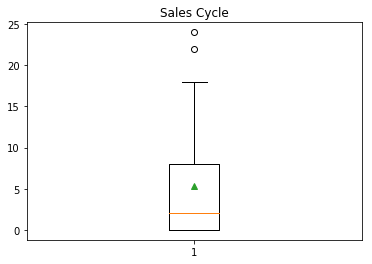

5.310344827586207

In [31]:
#Getting how long it takes for students to sign up
close_date = df['Days to Close'].dropna()
plt.boxplot(close_date, showmeans=True)
plt.title('Sales Cycle')
plt.show()
np.mean(close_date)

The graph tells quite an interesting story, while the mean closing date (meaning how long it takes someone to enroll from when they get the email that allows them to) is around 5 days, most people enroll about 9-10 days. The outliers definitely throw things off and higher our average close date. 

Therefore when people are accepted in the program we should be expecting them to enroll within 5-10 days. People who take longer to enroll are outlier. Though it should be noted that we have quite a few people who enroll on the same day they are accepted. This should inform our follow up strategy in that we should be more aggressive (but not pushy) in the first 10 days and we should focus less on potential students when after about 20 days. 


# 3)What is the distribution of how many different employees from Thinkful that students talk to?

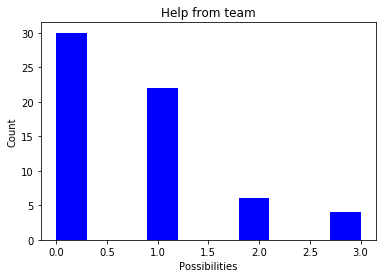

In [29]:
plt.hist(df['How much help'].values, color='blue')
plt.title('Help from team') 
plt.xlabel('Possibilities')
plt.ylabel('Count')
plt.show()

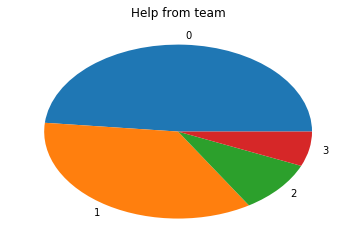

In [30]:
help=df['How much help'].value_counts()
plt.pie(help, labels=help.index)
plt.title('Help from team')
plt.show()

This graph shows us the grouping of how many students have talked with different admissions counselors. 0 tells us that the student only talked one ac, 1 means that that they talked to two and  so on and so forth.

This tells us that the majority of students have only talked to one or two admissions counselors. This makes sense, given the teams new structure of having counselors specialize in particular programs. These numbers also inform us that if we keep the structure the same where students talk to one or two counselors we can expect our close rates to stay the same. Meaning that since the majority of students only talked to one or two counselors our average close rate and time to enroll ratio should stay the same, given about two counselors are responsible for these numbers.

In [17]:
np.std(close_date)

6.848626584067092

In [33]:
scipy.stats.ttest_1samp(close_date, 5.3)

Ttest_1sampResult(statistic=0.007992797041269505, pvalue=0.9936794153632356)

The standard deviation with the close date tells a pretty deceptive story. Looking at the number one might assume that there is no real realiable way to determine when one might close. If the numbers for close date happen to be about 7 days apart, how can we really determine when someone will close or not, 7 days is a week apart? The answer is the extrmely high outliers of about 27, 25 days. That really throws off the standard deviation. I believe the graph above is a better story of how long it might take someone to close.

(Explain how t-test tells us that we can expect the mean to hold true across the board)

#Propose

##Lastly, make a proposal for a realistic future research project on this dataset that would use some data science techniques you'd like to learn in the bootcamp. Just like your earlier questions, your research proposal should present one or more clear questions. Then you should describe the techniques you would apply in order to arrive at an answer.

I really want to explore if talking to more Thinkful employees increases the win-probability for students. This would be a valuable insight that could inform our team structure. If it does increase win probability we should structure the team in such a way as to make sure that students talk to as many employees as possible. If it does not, we can either keep the team the same or make sure that students only talk with one person. 

I would also like to use this dataset combine with our marketing data to try and predict which students are most likely to close as they move through our marketing funnel and into our sales funnel. Given our companies past data on customers and our individual customers typical engagement with us the sales team should be made aware the probability of each person closing. This could really have an affect on our time management strategy, if ac’s knew who was hot and who was colder, we could be more strategic about who we focused on and who we did not.